In [1]:
import pandas as pd

# Load the Excel file to examine its contents
file_path_csv = '//Users/ripito/Documents/Document/5th Year TGUISS/課題研究/6th/課題研究 v2/sdenormalizedv2.csv'
data = pd.read_csv(file_path_csv)

# Display the first few rows of the dataset to understand its structure and contents
data.head(), data.columns
from sklearn.cluster import KMeans
import numpy as np

# Preparing the data for clustering
data_clustering = data.set_index('Unnamed: 0').T  # Transpose to have models as rows and features as columns

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_values = range(1, 6)  # Testing from 1 to 5 clusters
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

inertia



[45.000000000000014,
 29.27453925930734,
 18.298267704599,
 8.452793204935768,
 4.8761156517414594]

In [2]:
# k-mean でグループ分け？（2-3 良さそう）
k2_model = KMeans(n_clusters=2, random_state=42)
k3_model = KMeans(n_clusters=3, random_state=42)

# Fitting the models
clusters_k2 = k2_model.fit_predict(data_scaled)
clusters_k3 = k3_model.fit_predict(data_scaled)

# add cluster info and back/
data_clustering['Cluster_2'] = clusters_k2
data_clustering['Cluster_3'] = clusters_k3

data_clustering[['Cluster_2', 'Cluster_3']]


Unnamed: 0,Cluster_2,Cluster_3
GPT3.5,0,2
GPT4,1,2
BARD,0,2
Llama,0,0
Claude,0,0
Mistral AI,1,2
Gemini Pro,0,0
pplx,0,0
deepseek,1,1


In [7]:
# Excluding モデls
data_clustering_excluded = data_clustering.drop(['BARD', 'GPT3.5'])

# Standardize the data without GPT3.5 and GPT4
data_scaled_excluded = scaler.fit_transform(data_clustering_excluded.iloc[:, :-2])

# Apply K-means clustering with 2 and 3 clusters to see the new grouping
clusters_k2_excluded = KMeans(n_clusters=2, random_state=42).fit_predict(data_scaled_excluded)
clusters_k3_excluded = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled_excluded)

# Adding the cluster information back to the dataframe for easy interpretation
data_clustering_excluded['Cluster_2'] = clusters_k2_excluded
data_clustering_excluded['Cluster_3'] = clusters_k3_excluded

data_clustering_excluded[['Cluster_2', 'Cluster_3']]


Unnamed: 0,Cluster_2,Cluster_3
GPT4,1,2
Llama,1,1
Claude,0,0
Mistral AI,1,1
Gemini Pro,1,2
pplx,1,1
deepseek,1,1


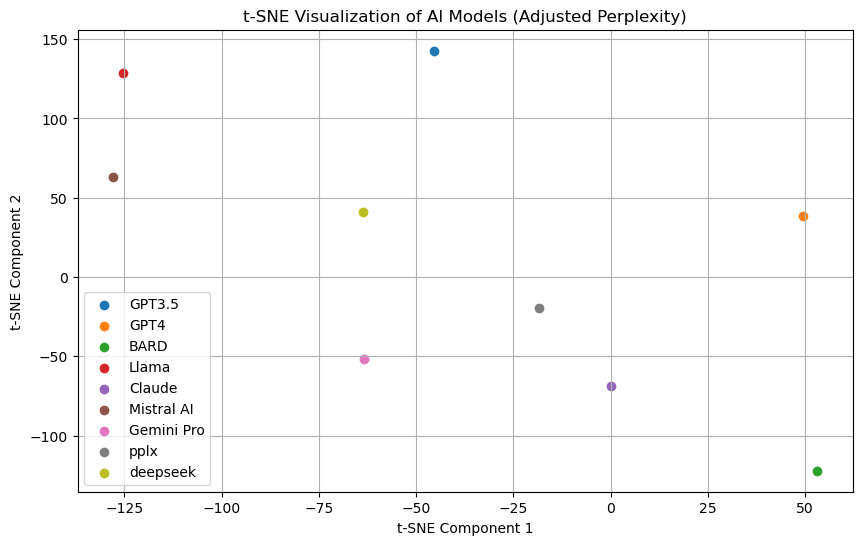

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducing the perplexity value because of the small number of samples (models)
tsne = TSNE(n_components=2, perplexity=3, random_state=42)  # Adjusting perplexity to less than the number of models
tsne_results = tsne.fit_transform(data_scaled)

# adjusted perplexity
plt.figure(figsize=(10, 6))
for i, label in enumerate(data_clustering.index):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1], label=label)
plt.legend()
plt.title('t-SNE Visualization of AI Models (Adjusted Perplexity)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()
